<a href="https://colab.research.google.com/github/OsamaAwniHamdan/Prediction-of-Product-Sales/blob/main/Project_4_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car Insurance Data
- https://www.kaggle.com/datasets/sagnik1511/car-insurance-data?resource=download

The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

Target: **Outcome**
- The outcome column indicates 1 if a customer has claimed his/her loan else 0.



Author: Osama Hamdan

In [41]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week19/Car_Insurance_Claim.csv'

### Load and clean data set

In [3]:
import pandas as pd
df = pd.read_csv(fpath)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

- The data has 19 features
- 11 numeric
- 8 categorical

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [7]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [8]:
df.nunique().sort_values()

VEHICLE_YEAR               2
VEHICLE_TYPE               2
CHILDREN                   2
MARRIED                    2
VEHICLE_OWNERSHIP          2
OUTCOME                    2
RACE                       2
GENDER                     2
EDUCATION                  3
INCOME                     4
DRIVING_EXPERIENCE         4
POSTAL_CODE                4
AGE                        4
DUIS                       7
PAST_ACCIDENTS            15
ANNUAL_MILEAGE            21
SPEEDING_VIOLATIONS       21
CREDIT_SCORE            9018
ID                     10000
dtype: int64

In [9]:
df.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


In [24]:
df['RACE'].value_counts()


RACE
majority    9012
minority     988
Name: count, dtype: int64

In [21]:
df.nunique() / len(df)

ID                     1.0000
AGE                    0.0004
GENDER                 0.0002
RACE                   0.0002
DRIVING_EXPERIENCE     0.0004
EDUCATION              0.0003
INCOME                 0.0004
CREDIT_SCORE           0.9018
VEHICLE_OWNERSHIP      0.0002
VEHICLE_YEAR           0.0002
MARRIED                0.0002
CHILDREN               0.0002
POSTAL_CODE            0.0004
ANNUAL_MILEAGE         0.0021
VEHICLE_TYPE           0.0002
SPEEDING_VIOLATIONS    0.0021
DUIS                   0.0007
PAST_ACCIDENTS         0.0015
OUTCOME                0.0002
dtype: float64

In [18]:
df['OUTCOME'].value_counts()

OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64

<Axes: >

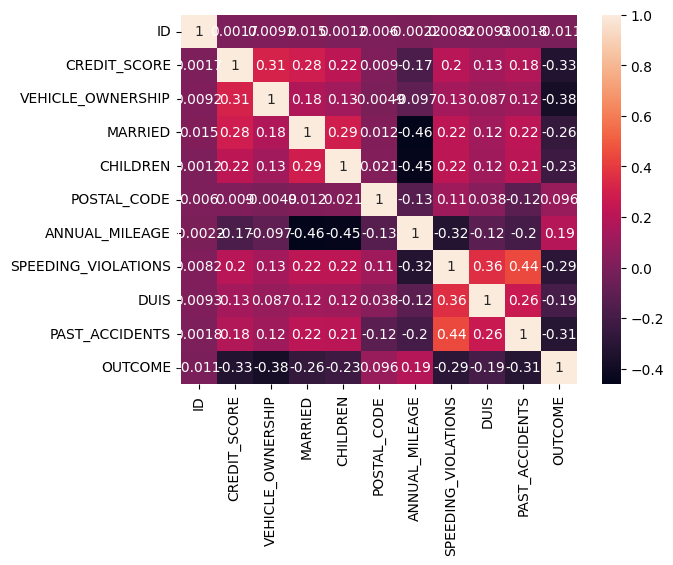

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

### EDA Function

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(display='diagram')

target= df['OUTCOME']
features = df.drop(columns=['OUTCOME', 'ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

simpleImputer = SimpleImputer(strategy='most_frequent')
num_cols = X_train.select_dtypes(include='number').columns
scaler = StandardScaler()
num_pip = make_pipeline(simpleImputer, scaler)
num_tuple = ('num', num_pip, num_cols)

cat_pip = make_pipeline(simpleImputer, OneHotEncoder(handle_unknown='ignore'))

cat_cols = X_train.select_dtypes(include='object').columns
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_tuple = ('cat', cat_pip, cat_cols)

col_transformer = ColumnTransformer(transformers=[num_tuple, cat_tuple], verbose_feature_names_out=False)

sampler = RandomUnderSampler(random_state=42)

rf_modle = RandomForestClassifier(random_state=42)

pipe = make_pipeline_imb(col_transformer, sampler, rf_modle)
pipe.fit(X_train, y_train)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ca...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomundersampler', RandomUnderSampler(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      5144
         1.0       0.83      1.00      0.91      2356

    accuracy                           0.94      7500
   macro avg       0.92      0.95      0.93      7500
weighted avg       0.95      0.94      0.94      7500



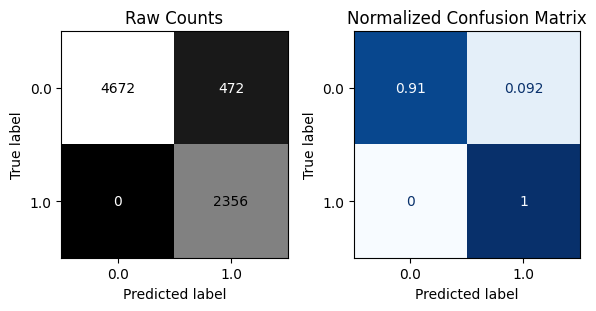


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1723
         1.0       0.68      0.82      0.75       777

    accuracy                           0.83      2500
   macro avg       0.80      0.82      0.81      2500
weighted avg       0.84      0.83      0.83      2500



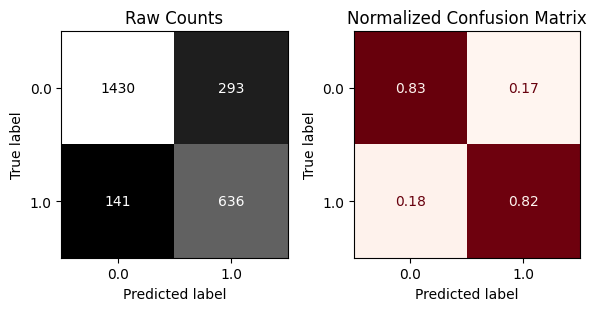

In [29]:
evaluate_classification(pipe, X_train, y_train, X_test, y_test)


#### Top 10 Featuers

In [31]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(pipe, X_test, y_test,n_repeats =5, random_state = 42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [32]:
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

DRIVING_EXPERIENCE     0.06768
VEHICLE_YEAR           0.04064
VEHICLE_OWNERSHIP      0.03856
POSTAL_CODE            0.01344
GENDER                 0.00712
CREDIT_SCORE           0.00504
EDUCATION              0.00416
AGE                    0.00328
RACE                   0.00208
MARRIED                0.00136
CHILDREN               0.00120
VEHICLE_TYPE           0.00016
SPEEDING_VIOLATIONS   -0.00008
PAST_ACCIDENTS        -0.00040
ANNUAL_MILEAGE        -0.00080
DUIS                  -0.00112
INCOME                -0.00112
Name: permutation importance, dtype: float64

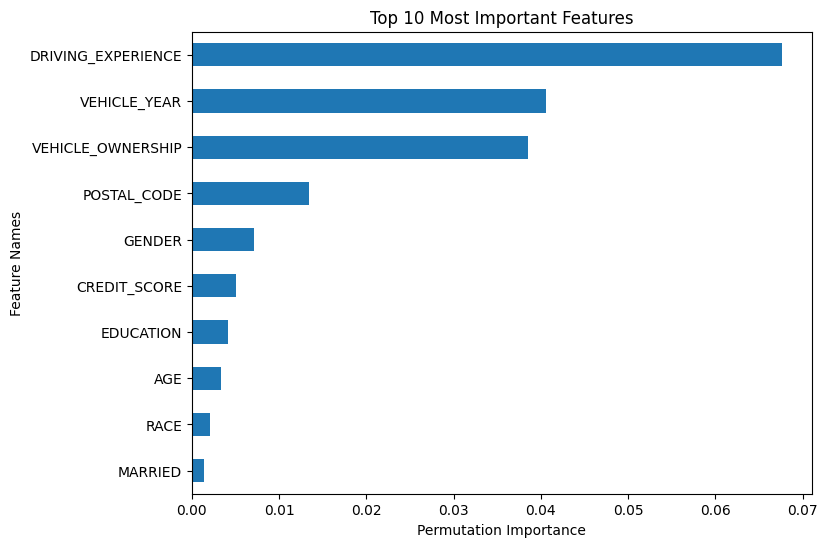

In [35]:

ax = plot_importance_color(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

- Top 10 featuers that I got seems affect the outcome.

#### Create Explanatory Visualizations for the most important features

Text(0, 0.5, 'Count')

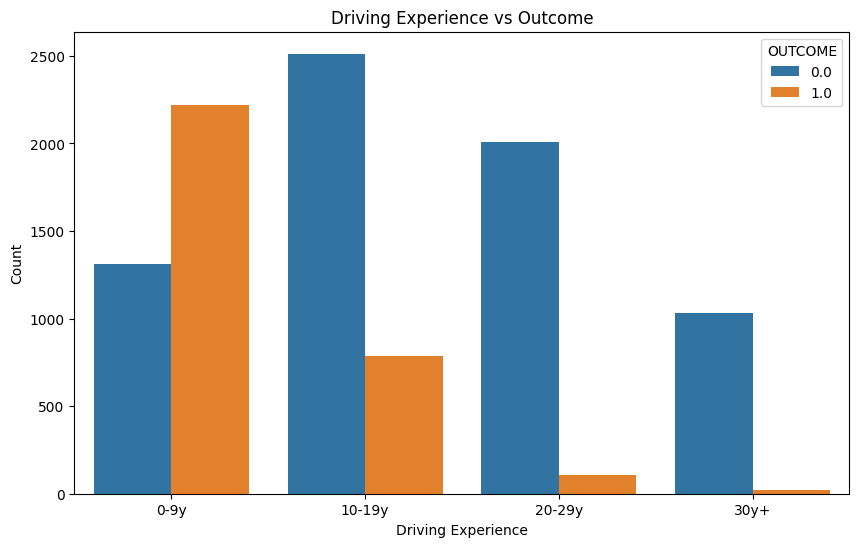

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DRIVING_EXPERIENCE', hue='OUTCOME', data=df)
plt.title('Driving Experience vs Outcome')
plt.xlabel('Driving Experience')
plt.ylabel('Count')


- More driving experience cause decreasing in loan outcome approvals.

Text(0, 0.5, 'Count')

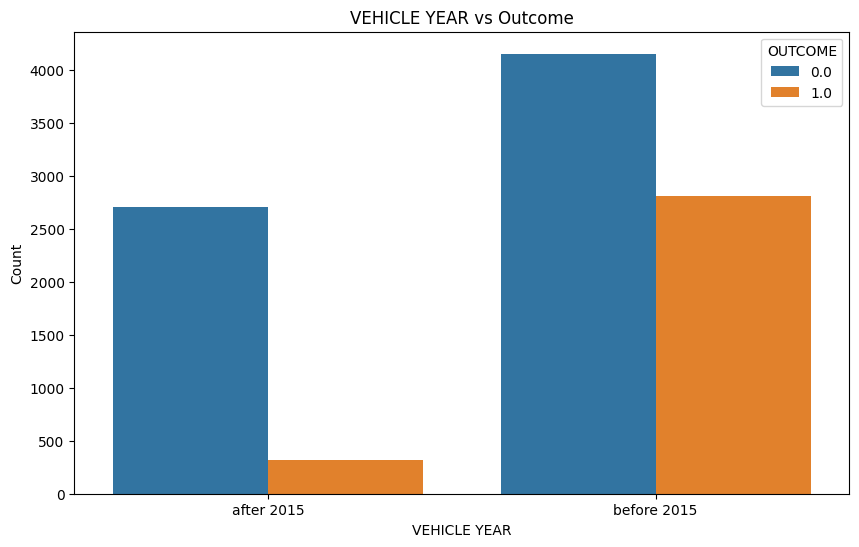

In [40]:


plt.figure(figsize=(10, 6))
sns.countplot(x='VEHICLE_YEAR', hue='OUTCOME', data=df)
plt.title('VEHICLE YEAR vs Outcome')
plt.xlabel('VEHICLE YEAR')
plt.ylabel('Count')

- increasing car model year cause lower outcome loan approvals.